# Capstone Final EDA and Modeling 
---
In this notebook I will prepare the data that I extracted from reddit to have EDA performed on it before I feed it to the ARIMA model.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline 

plt.style.context('seaborn')
pd.options.display.max_rows = 200

# Data Organization and Cleaning
---
Before I can do EDA or build models, I must first organize the data into dataframes and clean it.

In [3]:
#Importing and concatenating CSVs to create one large dataframe
batch1_top = pd.read_csv('./batch1_top.csv')
batch2_top = pd.read_csv('./batch2_top.csv')
batch3_top = pd.read_csv('./batch3_top.csv')
batch4_top = pd.read_csv('./batch4_top.csv')
batch5_top = pd.read_csv('./batch5_top.csv')
batch6_top = pd.read_csv('./batch6_top.csv')

In [4]:
X = pd.concat([batch1_top, batch2_top, batch3_top, batch4_top, batch5_top, batch6_top])

In [5]:
X

,Unnamed: 0,Comment,Compounds,Date,Neg,Neu,Pos
0,0,Maybe the real moon was the friends we met alo...,0.4767,daily_general_discussion_february_6_2018,0.000,0.780,0.220
1,1,Short summary for people who missed the SEC he...,0.1511,daily_general_discussion_february_6_2018,0.153,0.652,0.195
2,2,So I just started my crypto portfolio last wee...,0.7263,daily_general_discussion_february_6_2018,0.000,0.681,0.319
3,3,"Down 80% and hodling, it just don’t make sense...",0.3736,daily_general_discussion_february_6_2018,0.121,0.698,0.181
4,4,Feels good to be at -50% again. lol,0.6908,daily_general_discussion_february_6_2018,0.000,0.513,0.487
5,5,"Giancarlo on blockchain tech: ""I'm no pie-in-t...",0.9558,daily_general_discussion_february_6_2018,0.024,0.723,0.254
6,6,Coinbase is like magic. I buy $3000 in litecoi...,0.4738,daily_general_discussion_february_6_2018,0.000,0.917,0.083
7,7,Soon my trezor will be worth more then whats o...,0.2263,daily_general_discussion_february_6_2018,0.000,0.840,0.160
8,8,"Sooo, is there anyone else\nwho's down 80% tha...",0.0000,daily_general_discussion_february_6_2018,0.000,1.000,0.000
9,9,*Puts on small glasses*\n*Grabs feather quille...,-0.3412,daily_general_discussion_february_6_2018,0.147,0.853,0.000


In [21]:
X.corr()

,Unnamed: 0,Compounds,Neg,Neu,Pos
Unnamed: 0,1.000000,0.020268,-0.026951,0.021729,-0.003543
Compounds,0.020268,1.000000,-0.578618,-0.111539,0.638471
Neg,-0.026951,-0.578618,1.000000,-0.579959,-0.152476
Neu,0.021729,-0.111539,-0.579959,1.000000,-0.705897
Pos,-0.003543,0.638471,-0.152476,-0.705897,1.000000


In [25]:
# Grouping the data by its corresponding date and having it return the mean score for each on that date
X.groupby('Date').mean()

,Unnamed: 0,Compounds,Neg,Neu,Pos
Date,,,,,
bitgrail_owner_interview_request,7169.5,0.256950,0.000000,0.712500,0.287500
daily_general_discussion_december_10_2017,2665.0,0.226726,0.045333,0.848769,0.105903
daily_general_discussion_december_11_2017,2428.0,0.196193,0.053229,0.842871,0.103885
daily_general_discussion_december_12_2017,2056.5,0.207016,0.037869,0.862274,0.099856
daily_general_discussion_december_13_2017,1599.5,0.184469,0.039998,0.862844,0.097171
daily_general_discussion_december_14_2017,1183.0,0.227509,0.038439,0.855047,0.103901
daily_general_discussion_december_15_2017,842.5,0.269821,0.030282,0.852560,0.117154
daily_general_discussion_december_16_2017,525.0,0.190485,0.047552,0.846896,0.105564
daily_general_discussion_december_17_2017,178.0,0.206755,0.036515,0.863585,0.099896


In [55]:
#Repeating process for Second Comments
batch1_sec = pd.read_csv('./batch1_sec.csv')
batch2_sec = pd.read_csv('./batch2_sec.csv')
batch3_sec = pd.read_csv('./batch3_sec.csv')
batch4_sec = pd.read_csv('./batch4_sec.csv')
batch5_sec = pd.read_csv('./batch5_sec.csv')
batch6_sec = pd.read_csv('./batch6_sec.csv')

In [56]:
X2 = pd.concat([batch1_sec, batch2_sec, batch3_sec, batch4_sec, batch5_sec, batch6_sec])

In [57]:
X2

,Unnamed: 0,Comment,Compounds,Date,Neg,Neu,Pos
0,0.0,"Shit, this made my fucking day and it's only 2...",-0.1027,daily_general_discussion_february_6_2018,0.191,0.638,0.170
1,1.0,"That's my favourite comment of the year, 10 up...",0,daily_general_discussion_february_6_2018,0.000,1.000,0.000
2,2.0,You are my lambo.,0,daily_general_discussion_february_6_2018,0.000,1.000,0.000
3,3.0,Friendships made in tough times are forged fro...,0.2732,daily_general_discussion_february_6_2018,0.124,0.661,0.215
4,4.0,I'm happy to be friends once it moves in an up...,0.7783,daily_general_discussion_february_6_2018,0.000,0.618,0.382
5,5.0,I will now mind-sticky this.,0,daily_general_discussion_february_6_2018,0.000,1.000,0.000
6,6.0,I swear this community always cheers me up whe...,-0.1531,daily_general_discussion_february_6_2018,0.250,0.585,0.165
7,7.0,"Dude, I have never been so happy of losing money!",0.4887,daily_general_discussion_february_6_2018,0.192,0.470,0.338
8,8.0,Wow *single tear*,0.5859,daily_general_discussion_february_6_2018,0.000,0.345,0.655
9,9.0,"Hey hello hodlers, did we just become friends?",0.4767,daily_general_discussion_february_6_2018,0.000,0.693,0.307


In [58]:
X2['Date'].value_counts()

daily_general_discussion_january_8_2018           6399
daily_general_discussion_january_16_2018          5426
daily_general_discussion_january_17_2018          5030
daily_general_discussion_january_5_2018           4272
daily_general_discussion_january_10_2018          4131
daily_general_discussion_february_5_2018          3994
daily_general_discussion_january_4_2018           3848
daily_general_discussion_february_2_2018          3765
daily_general_discussion_february_6_2018          3595
daily_general_discussion_january_3_2018           3567
daily_general_discussion_january_6_2018           3466
daily_general_discussion_january_11_2018          2998
daily_general_discussion_january_12_2018          2932
daily_general_discussion_january_15_2018          2824
daily_general_discussion_january_30_2018          2731
daily_general_discussion_january_2_2018           2568
daily_general_discussion_january_18_2018          2534
daily_general_discussion_january_22_2018          2155
daily_gene

In [59]:
X.to_csv('top_final.csv',encoding = 'utf-8')
X2.to_csv('sec_final.csv', encoding = 'utf-8')

In [60]:
X2['Compounds'] = X2['Compounds'].fillna(0)

In [61]:
X2['Compounds'].isnull().sum()

0

In [62]:
X2['Compounds'] = X2['Compounds'].apply(lambda x: 0 if x == 'daily_general_discussion_january_2_2018' else x)
X2['Date'] = X2['Date'].apply(lambda x: 'daily_general_discussion_january_2_2018' if x == '0.0' else x)

In [63]:
X2['Date'].value_counts()

daily_general_discussion_january_8_2018           6399
daily_general_discussion_january_16_2018          5426
daily_general_discussion_january_17_2018          5030
daily_general_discussion_january_5_2018           4272
daily_general_discussion_january_10_2018          4131
daily_general_discussion_february_5_2018          3994
daily_general_discussion_january_4_2018           3848
daily_general_discussion_february_2_2018          3765
daily_general_discussion_february_6_2018          3595
daily_general_discussion_january_3_2018           3567
daily_general_discussion_january_6_2018           3466
daily_general_discussion_january_11_2018          2998
daily_general_discussion_january_12_2018          2932
daily_general_discussion_january_15_2018          2824
daily_general_discussion_january_30_2018          2731
daily_general_discussion_january_2_2018           2569
daily_general_discussion_january_18_2018          2534
daily_general_discussion_january_22_2018          2155
daily_gene

In [64]:
X2['Compounds'] = X2['Compounds'].astype(float)

In [65]:
X2.groupby('Date').mean()

,Unnamed: 0,Compounds,Neg,Neu,Pos
Date,,,,,
bitgrail_owner_interview_request,14126.5,0.348600,0.096000,0.255500,0.648000
daily_general_discussion_december_10_2017,4895.5,0.243703,0.046884,0.827417,0.125717
daily_general_discussion_december_11_2017,4432.0,0.232837,0.040673,0.830799,0.128531
daily_general_discussion_december_12_2017,3710.5,0.196554,0.044518,0.838239,0.117252
daily_general_discussion_december_13_2017,2882.5,0.208199,0.043122,0.831312,0.125570
daily_general_discussion_december_14_2017,2122.5,0.198583,0.055601,0.814141,0.130274
daily_general_discussion_december_15_2017,1490.5,0.202853,0.045900,0.826956,0.127150
daily_general_discussion_december_16_2017,933.5,0.176746,0.050890,0.824682,0.124429
daily_general_discussion_december_17_2017,325.0,0.204332,0.051639,0.810464,0.136361


In [204]:
# X2 = X2.drop('Unnamed: 0', axis=1)
# X = X.drop('Unnamed: 0', axis=1)

In [67]:
X2

,Comment,Compounds,Date,Neg,Neu,Pos
0,"Shit, this made my fucking day and it's only 2...",-0.1027,daily_general_discussion_february_6_2018,0.191,0.638,0.170
1,"That's my favourite comment of the year, 10 up...",0.0000,daily_general_discussion_february_6_2018,0.000,1.000,0.000
2,You are my lambo.,0.0000,daily_general_discussion_february_6_2018,0.000,1.000,0.000
3,Friendships made in tough times are forged fro...,0.2732,daily_general_discussion_february_6_2018,0.124,0.661,0.215
4,I'm happy to be friends once it moves in an up...,0.7783,daily_general_discussion_february_6_2018,0.000,0.618,0.382
5,I will now mind-sticky this.,0.0000,daily_general_discussion_february_6_2018,0.000,1.000,0.000
6,I swear this community always cheers me up whe...,-0.1531,daily_general_discussion_february_6_2018,0.250,0.585,0.165
7,"Dude, I have never been so happy of losing money!",0.4887,daily_general_discussion_february_6_2018,0.192,0.470,0.338
8,Wow *single tear*,0.5859,daily_general_discussion_february_6_2018,0.000,0.345,0.655
9,"Hey hello hodlers, did we just become friends?",0.4767,daily_general_discussion_february_6_2018,0.000,0.693,0.307


In [69]:
#filtering out posts that did not occur in daily discussions
X = X[X['Date'] != 'bitgrail_owner_interview_request']
X = X[X['Date'] != 'price_analysis_of_grs_before_and_after_the_b2x']
X = X[X['Date'] != 'dnv_gl_vechain_to_make_announcement']
X = X[X['Date'] != 'paywithcrypto_news_discussion']

In [71]:
X2 = X2[X2['Date'] != 'bitgrail_owner_interview_request']
X2 = X2[X2['Date'] != 'price_analysis_of_grs_before_and_after_the_b2x']
X2 = X2[X2['Date'] != 'dnv_gl_vechain_to_make_announcement']
X2 = X2[X2['Date'] != 'paywithcrypto_news_discussion']

In [75]:
X_top = X.groupby('Date').mean()

In [83]:
X_sec = X2.groupby('Date').mean()

In [84]:
X_top.to_csv('X_top.csv')
X_sec.to_csv('X_sec.csv')

In [6]:
X_top1 = pd.read_csv('./X_top.csv')
X_sec1 = pd.read_csv('./X_sec.csv')

In [7]:
X_sec1['Date'] = X_sec1['Date'].str.split('_')

In [8]:
X_sec1['Date'] = [y[3:] for y in [x for x in X_sec1['Date']]]

In [9]:
X_top1.to_csv('X_top1.csv')
X_sec1.to_csv('X_sec1.csv')

In [10]:
X_top1 = pd.read_csv('./X_top2.csv')
X_sec1 = pd.read_csv('./X_sec2.csv')

In [11]:
X_top1

,Unnamed: 0,Compounds,Neg,Neu,Pos,Date,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC
0,23,0.214422,0.043327,0.846083,0.110581,31-Dec-17,"7,673.80","6,946.60","7,860.00","6,000.00",10.42
1,22,0.164927,0.059688,0.833904,0.106405,30-Dec-17,"6,949.90","8,185.20","8,378.00","6,658.80",-15.25
2,20,0.134692,0.055824,0.847602,0.096581,29-Dec-17,"8,200.00","9,225.10","9,403.30","7,840.00",-11.06
3,19,0.172202,0.054932,0.842203,0.102877,28-Dec-17,"9,219.40","8,887.10","9,495.00","8,189.60",3.64
4,18,0.178622,0.060382,0.831824,0.107795,27-Dec-17,"8,895.80","9,181.00","9,201.00","7,972.20",-3.11
5,17,0.219207,0.043764,0.856777,0.099465,26-Dec-17,"10,175.00","11,215.00","11,250.00","9,864.90",-9.25
6,16,0.230835,0.048410,0.816695,0.133035,25-Dec-17,"11,212.00","11,836.00","11,957.00","11,074.00",-5.30
7,15,0.239733,0.047670,0.826120,0.123925,24-Dec-17,"11,839.00","11,455.10","12,181.00","11,398.00",3.30
8,14,0.172187,0.056182,0.833572,0.110273,23-Dec-17,"11,461.00","11,068.00","11,683.00","10,822.00",3.53
9,13,0.110644,0.070642,0.815983,0.112218,22-Dec-17,"11,070.00","11,144.00","11,647.00","10,298.00",-0.68


In [12]:
X_top1['Date'] = pd.to_datetime(X_top1['Date'])

In [13]:
X_top1 = X_top1.sort_values(by='Date', ascending=False)

In [14]:
X_top1 = X_top1.reset_index()

In [15]:
X_top1 = X_top1.drop(['index', 'Unnamed: 0'], axis= 1)

In [16]:
X_sec1['Date'] = pd.to_datetime(X_sec1['Date'])
X_sec1 = X_sec1.sort_values(by='Date', ascending=False)
X_sec1 = X_sec1.reset_index()
X_sec1 = X_sec1.drop(['index', 'Unnamed: 0'], axis= 1)

In [17]:
X_sec1

,Compounds,Neg,Neu,Pos,Date,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC
0,0.073825,0.084296,0.788181,0.127245,2018-02-06,"7,673.80","6,946.60","7,860.00","6,000.00",10.42
1,0.049921,0.090539,0.792700,0.116515,2018-02-05,"6,949.90","8,185.20","8,378.00","6,658.80",-15.25
2,0.068296,0.079248,0.799594,0.120407,2018-02-04,"8,200.00","9,225.10","9,403.30","7,840.00",-11.06
3,0.094978,0.069398,0.806927,0.120882,2018-02-03,"9,219.40","8,887.10","9,495.00","8,189.60",3.64
4,0.059896,0.079927,0.799180,0.118497,2018-02-02,"8,895.80","9,181.00","9,201.00","7,972.20",-3.11
5,0.067462,0.079477,0.795052,0.122906,2018-01-30,"10,175.00","11,215.00","11,250.00","9,864.90",-9.25
6,0.125777,0.060464,0.826108,0.112864,2018-01-29,"11,212.00","11,836.00","11,957.00","11,074.00",-5.30
7,0.119030,0.065364,0.815930,0.118701,2018-01-28,"11,839.00","11,455.10","12,181.00","11,398.00",3.30
8,0.132821,0.055817,0.823304,0.118688,2018-01-27,"11,461.00","11,068.00","11,683.00","10,822.00",3.53
9,0.109878,0.069383,0.804187,0.124333,2018-01-26,"11,070.00","11,144.00","11,647.00","10,298.00",-0.68


In [18]:
# Removing the commas in the prices of Bitcoin and casting them as floats
X_top1['Price_BTC'] = X_top1['Price_BTC'].str.replace(',','')
X_top1['Open_BTC'] = X_top1['Open_BTC'].str.replace(',','')
X_top1['High_BTC'] = X_top1['High_BTC'].str.replace(',','')
X_top1['Low_BTC'] = X_top1['Low_BTC'].str.replace(',','')

In [19]:
X_top1['Price_BTC'] = X_top1['Price_BTC'].astype(float)
X_top1['Open_BTC'] = X_top1['Open_BTC'].astype(float)
X_top1['High_BTC'] = X_top1['High_BTC'].astype(float)
X_top1['Low_BTC'] = X_top1['Low_BTC'].astype(float)

In [20]:
X_top1.dtypes

Compounds                  float64
Neg                        float64
Neu                        float64
Pos                        float64
Date                datetime64[ns]
Price_BTC                  float64
Open_BTC                   float64
High_BTC                   float64
Low_BTC                    float64
Pecent_Delta_BTC           float64
dtype: object

In [21]:
X_sec1['Price_BTC'] = X_sec1['Price_BTC'].str.replace(',','')
X_sec1['Open_BTC'] = X_sec1['Open_BTC'].str.replace(',','')
X_sec1['High_BTC'] = X_sec1['High_BTC'].str.replace(',','')
X_sec1['Low_BTC'] = X_sec1['Low_BTC'].str.replace(',','')
X_sec1['Price_BTC'] = X_sec1['Price_BTC'].astype(float)
X_sec1['Open_BTC'] = X_sec1['Open_BTC'].astype(float)
X_sec1['High_BTC'] = X_sec1['High_BTC'].astype(float)
X_sec1['Low_BTC'] = X_sec1['Low_BTC'].astype(float)

# Correlations and Heatmap
---
The correlation matrix and corresponding heatmap do not show any strong correlations between sentiment scores and the Bitcoin related data.

In [22]:
X_top1.corr()

,Compounds,Neg,Neu,Pos,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC
Compounds,1.000000,-0.706443,0.135396,0.491171,-0.369674,-0.358188,-0.365288,-0.361622,-0.018941
Neg,-0.706443,1.000000,-0.661009,-0.067683,0.375792,0.361489,0.370772,0.365751,0.016254
Neu,0.135396,-0.661009,1.000000,-0.703474,-0.302732,-0.292117,-0.300305,-0.296009,-0.001969
Pos,0.491171,-0.067683,-0.703474,1.000000,0.035289,0.035696,0.037162,0.035768,-0.016052
Price_BTC,-0.369674,0.375792,-0.302732,0.035289,1.000000,0.985052,0.995317,0.993367,0.015000
Open_BTC,-0.358188,0.361489,-0.292117,0.035696,0.985052,1.000000,0.993846,0.986272,-0.147573
High_BTC,-0.365288,0.370772,-0.300305,0.037162,0.995317,0.993846,1.000000,0.989296,-0.058421
Low_BTC,-0.361622,0.365751,-0.296009,0.035768,0.993367,0.986272,0.989296,1.000000,-0.032845
Pecent_Delta_BTC,-0.018941,0.016254,-0.001969,-0.016052,0.015000,-0.147573,-0.058421,-0.032845,1.000000


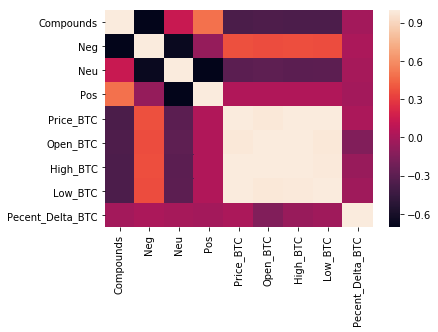

In [24]:
sns.heatmap(X_top1.corr());

# EDA
---
Here I am going to perform EDA on the data to determine the appropriate parameters to use in the ARIMA model.

In [25]:
X_top1['index'] = X_top1['Date']

In [26]:
X_top1.set_index('index', inplace=True)

In [27]:
X_top1

,Compounds,Neg,Neu,Pos,Date,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC
index,,,,,,,,,,
2018-02-06,0.069697,0.080034,0.805216,0.114757,2018-02-06,13354.0,13794.0,13893.0,12787.0,-3.23
2018-02-05,0.047223,0.097361,0.790542,0.111607,2018-02-05,14709.8,13448.0,15300.0,12810.0,10.15
2018-02-04,0.032345,0.092067,0.805225,0.102692,2018-02-04,15155.0,14713.0,15428.0,14522.0,3.03
2018-02-03,0.123438,0.072832,0.813816,0.113352,2018-02-03,15160.0,15150.0,15390.0,14064.0,0.03
2018-02-02,0.025665,0.095717,0.809588,0.094703,2018-02-02,16917.0,15159.0,17101.0,14769.0,11.59
2018-01-30,0.054220,0.092816,0.799510,0.107664,2018-01-30,14660.0,15829.0,16300.0,13021.0,-7.62
2018-01-29,0.121624,0.064277,0.843932,0.091792,2018-01-29,16754.0,14937.0,17443.0,14937.0,11.72
2018-01-28,0.149950,0.060465,0.839476,0.100054,2018-01-28,16967.0,16754.0,17500.0,16234.0,1.27
2018-01-27,0.147383,0.050677,0.850559,0.098747,2018-01-27,16181.0,17010.0,17288.0,15674.0,-4.63


In [28]:
#Lagging the Sentiment scores to correspond with the next day's Bitcoin data
X_top1['Compound_shift'] = X_top1['Compounds'].shift(1)
X_top1['Neg_shift'] = X_top1['Neg'].shift(1)
X_top1['Pos_shift'] = X_top1['Pos'].shift(1)
X_top1['Neu_shift'] = X_top1['Neu'].shift(1)

In [42]:
X_sec1['Compound_shift'] = X_sec1['Compounds'].shift(1)
X_sec1['Neg_shift'] = X_sec1['Neg'].shift(1)
X_sec1['Pos_shift'] = X_sec1['Pos'].shift(1)
X_sec1['Neu_shift'] = X_sec1['Neu'].shift(1)

In [29]:
X_top1

,Compounds,Neg,Neu,Pos,Date,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC,Compound_shift,Neg_shift,Pos_shift,Neu_shift
index,,,,,,,,,,,,,,
2018-02-06,0.069697,0.080034,0.805216,0.114757,2018-02-06,13354.0,13794.0,13893.0,12787.0,-3.23,NaN,NaN,NaN,NaN
2018-02-05,0.047223,0.097361,0.790542,0.111607,2018-02-05,14709.8,13448.0,15300.0,12810.0,10.15,0.069697,0.080034,0.114757,0.805216
2018-02-04,0.032345,0.092067,0.805225,0.102692,2018-02-04,15155.0,14713.0,15428.0,14522.0,3.03,0.047223,0.097361,0.111607,0.790542
2018-02-03,0.123438,0.072832,0.813816,0.113352,2018-02-03,15160.0,15150.0,15390.0,14064.0,0.03,0.032345,0.092067,0.102692,0.805225
2018-02-02,0.025665,0.095717,0.809588,0.094703,2018-02-02,16917.0,15159.0,17101.0,14769.0,11.59,0.123438,0.072832,0.113352,0.813816
2018-01-30,0.054220,0.092816,0.799510,0.107664,2018-01-30,14660.0,15829.0,16300.0,13021.0,-7.62,0.025665,0.095717,0.094703,0.809588
2018-01-29,0.121624,0.064277,0.843932,0.091792,2018-01-29,16754.0,14937.0,17443.0,14937.0,11.72,0.054220,0.092816,0.107664,0.799510
2018-01-28,0.149950,0.060465,0.839476,0.100054,2018-01-28,16967.0,16754.0,17500.0,16234.0,1.27,0.121624,0.064277,0.091792,0.843932
2018-01-27,0.147383,0.050677,0.850559,0.098747,2018-01-27,16181.0,17010.0,17288.0,15674.0,-4.63,0.149950,0.060465,0.100054,0.839476


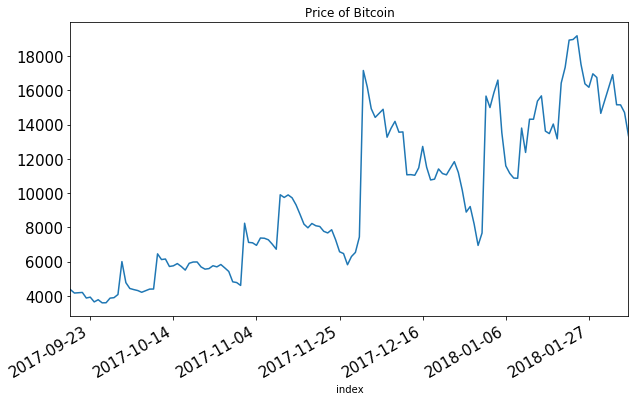

In [38]:
X_top1.Price_BTC.plot(figsize=(10,6), title= 'Price of Bitcoin', fontsize=15);

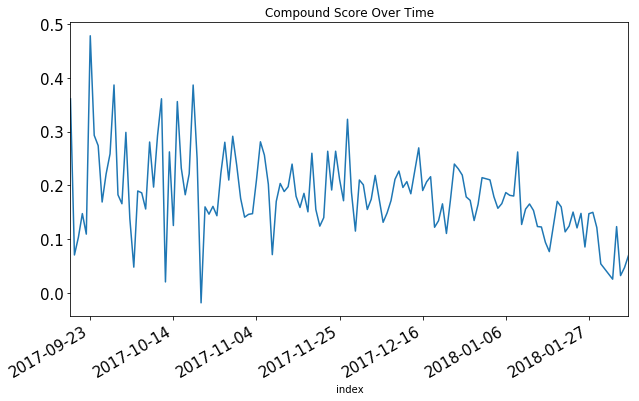

In [36]:
X_top1.Compounds.plot(figsize=(10,6), title= 'Compound Score Over Time', fontsize=15)

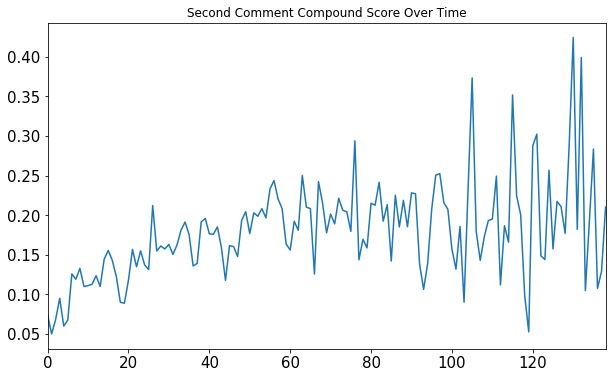

In [44]:
X_sec1.Compounds.plot(figsize=(10,6), title= 'Second Comment Compound Score Over Time', fontsize=15);

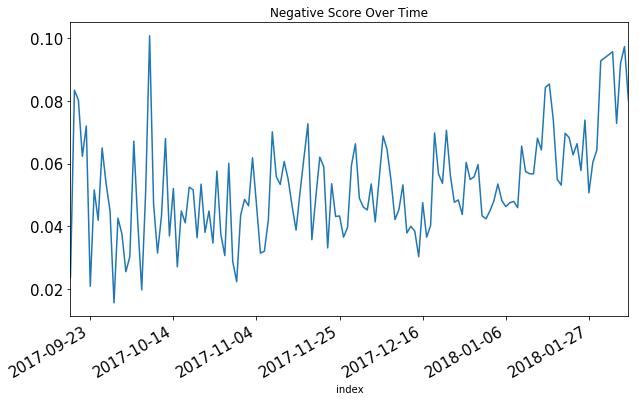

In [39]:
X_top1.Neg.plot(figsize=(10,6), title= 'Negative Score Over Time', fontsize=15);

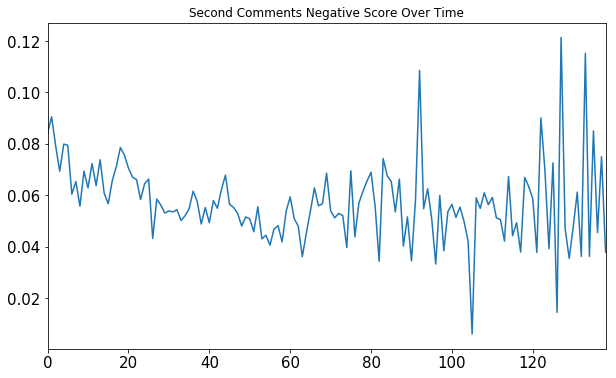

In [45]:
X_sec1.Neg.plot(figsize=(10,6), title= 'Second Comments Negative Score Over Time', fontsize=15);

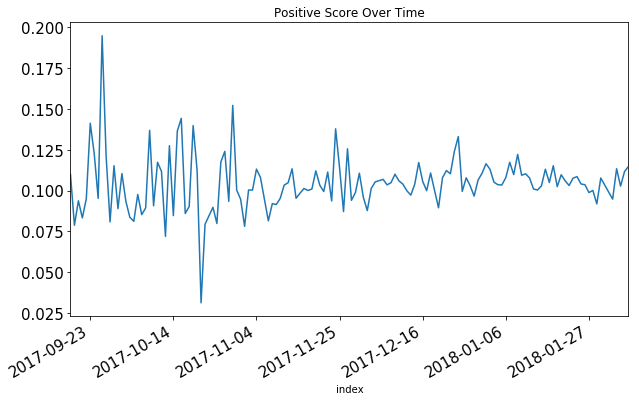

In [40]:
X_top1.Pos.plot(figsize=(10,6), title= 'Positive Score Over Time', fontsize=15);

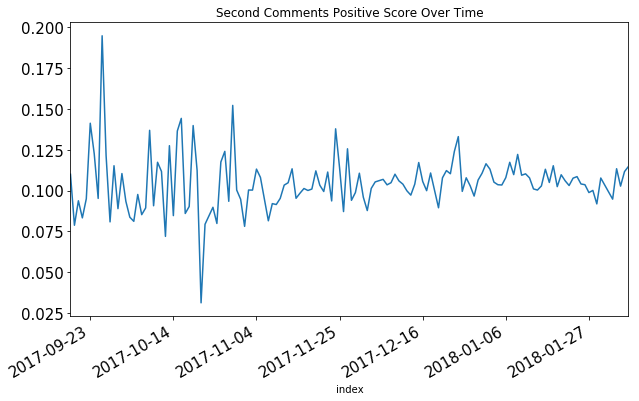

In [46]:
X_top1.Pos.plot(figsize=(10,6), title= 'Second Comments Positive Score Over Time', fontsize=15);

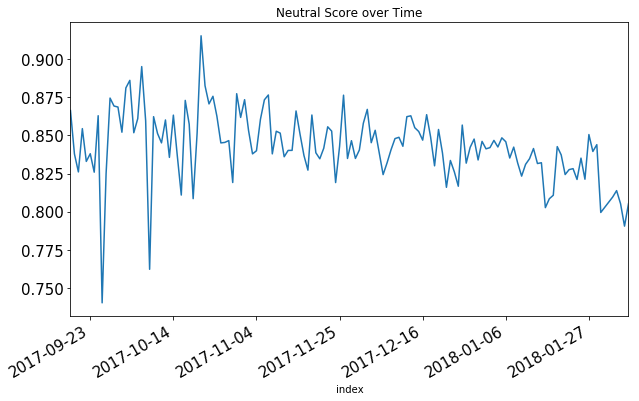

In [41]:
X_top1.Neu.plot(figsize=(10,6), title= 'Neutral Score over Time', fontsize=15);

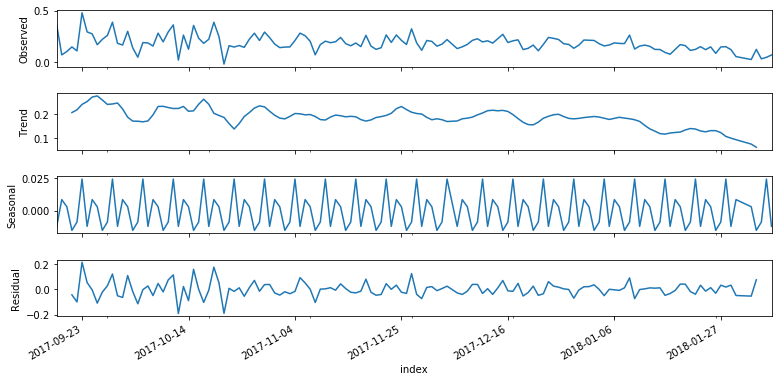

In [224]:
decomposition = seasonal_decompose(X_top1.Compounds, freq=6)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)

In [69]:
# decomposition1 = seasonal_decompose(X_sec1.Compounds, freq=1)  
# fig = plt.figure()  
# fig = decomposition1.plot()  
# fig.set_size_inches(12, 6)

In [52]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

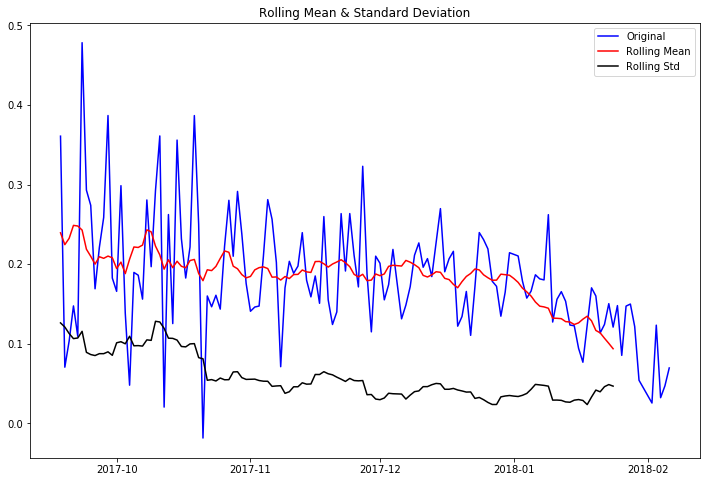

Results of Dickey-Fuller Test:
Test Statistic                -8.962250e+00
p-value                        8.164833e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (5%)           -2.882722e+00
Critical Value (1%)           -3.478648e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [226]:
# perform test
test_stationarity(X_top1.Compounds)

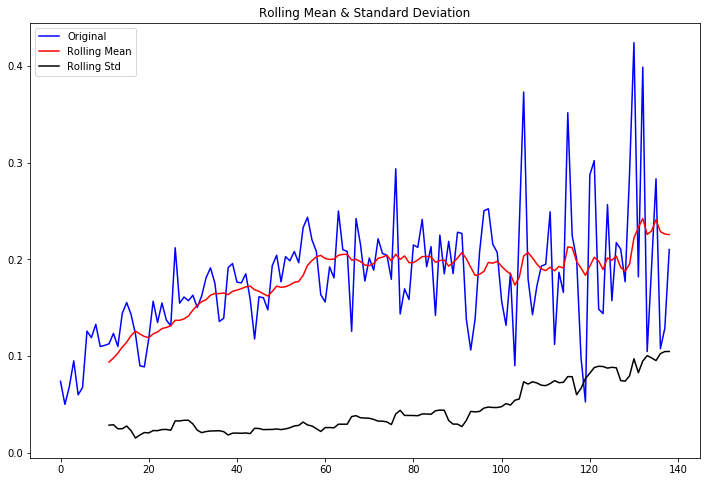

Results of Dickey-Fuller Test:
Test Statistic                  -2.660773
p-value                          0.081076
#Lags Used                       8.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [53]:
test_stationarity(X_sec1.Compounds)

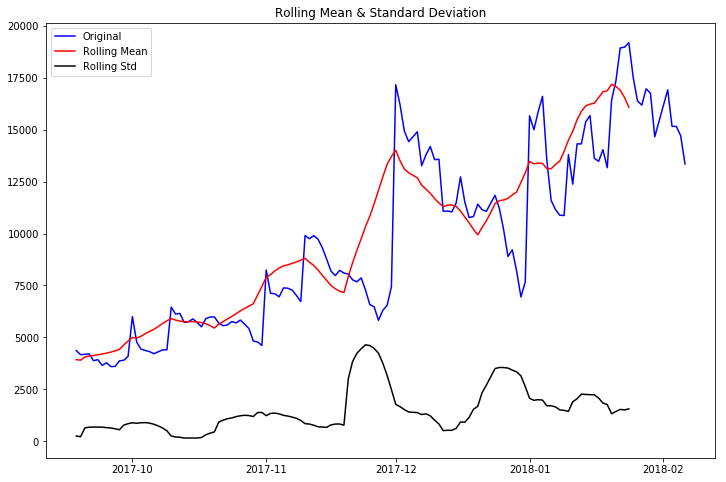

Results of Dickey-Fuller Test:
Test Statistic                  -1.878717
p-value                          0.342138
#Lags Used                       0.000000
Number of Observations Used    138.000000
Critical Value (5%)             -2.882722
Critical Value (1%)             -3.478648
Critical Value (10%)            -2.578065
dtype: float64


In [227]:
# perform test
test_stationarity(X_top1.Price_BTC)

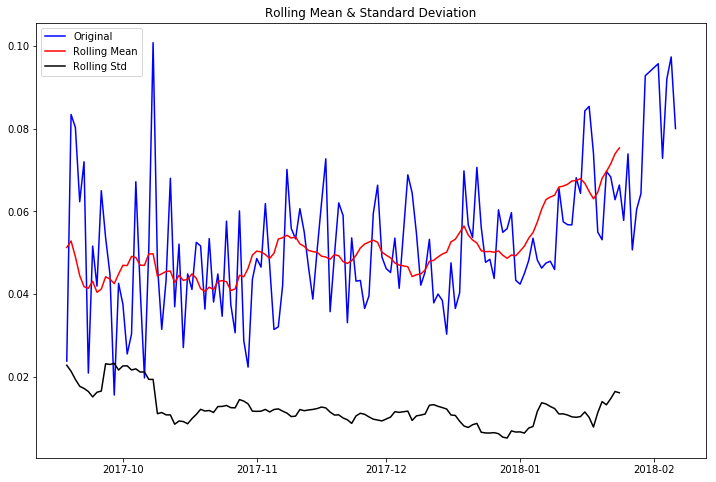

Results of Dickey-Fuller Test:
Test Statistic                -7.493401e+00
p-value                        4.444100e-11
#Lags Used                     0.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (5%)           -2.882722e+00
Critical Value (1%)           -3.478648e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [437]:
test_stationarity(X_top1.Neg)

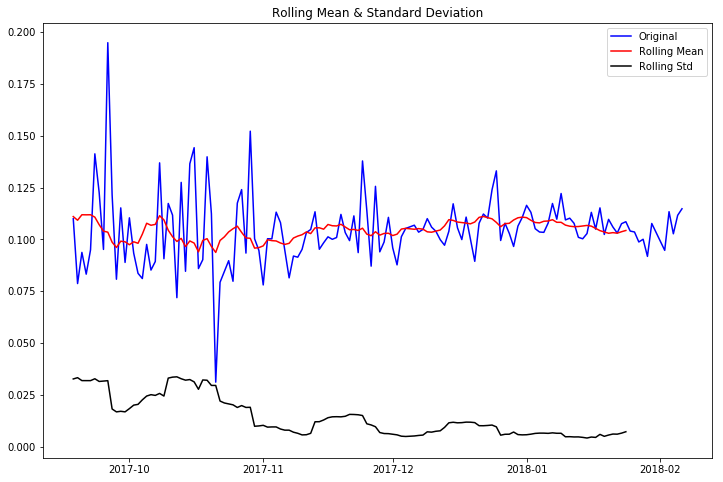

Results of Dickey-Fuller Test:
Test Statistic                -6.101673e+00
p-value                        9.801630e-08
#Lags Used                     5.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (5%)           -2.883528e+00
Critical Value (1%)           -3.480500e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


In [438]:
test_stationarity(X_top1.Pos)

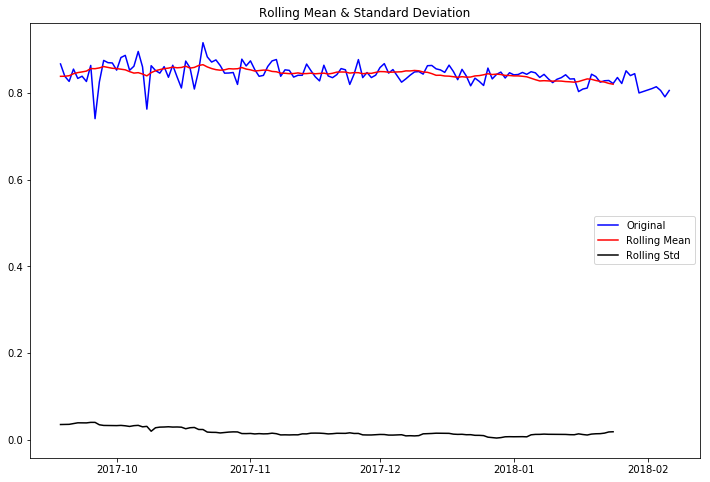

Results of Dickey-Fuller Test:
Test Statistic                  -5.016282
p-value                          0.000021
#Lags Used                       2.000000
Number of Observations Used    136.000000
Critical Value (5%)             -2.883037
Critical Value (1%)             -3.479372
Critical Value (10%)            -2.578234
dtype: float64


In [439]:
test_stationarity(X_top1.Neu)

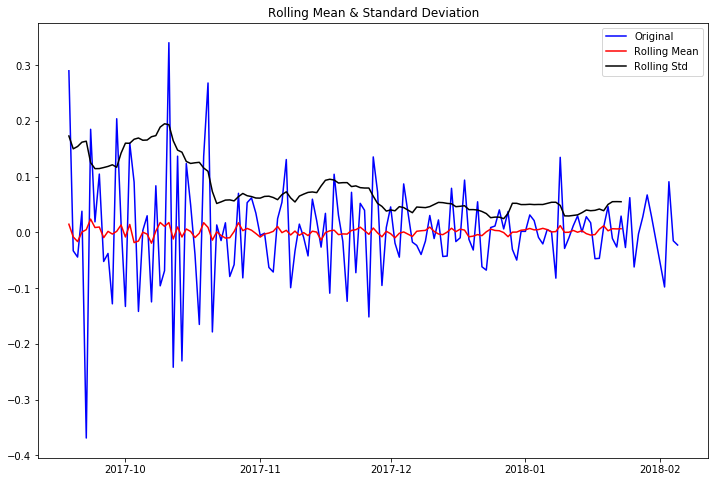

Results of Dickey-Fuller Test:
Test Statistic                  -5.354497
p-value                          0.000004
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (5%)             -2.885340
Critical Value (1%)             -3.484667
Critical Value (10%)            -2.579463
dtype: float64


In [228]:
#Differencing the data for stationarity
X_top1['first_difference'] = X_top1.Compounds - X_top1.Compounds.shift(1)  
test_stationarity(X_top1.first_difference.dropna(inplace=False))

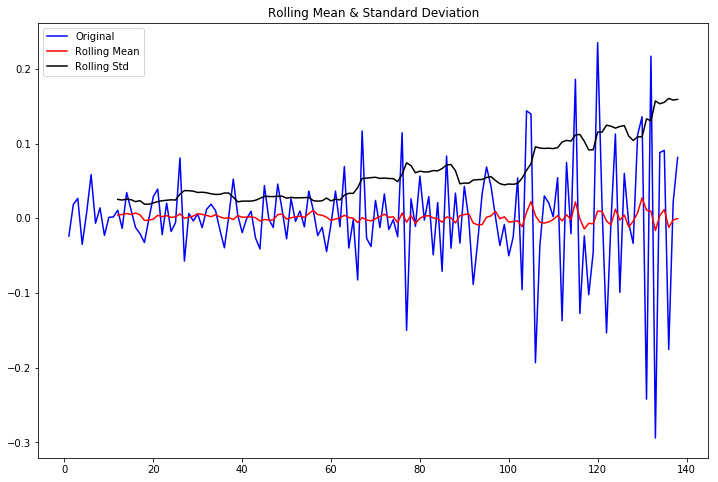

Results of Dickey-Fuller Test:
Test Statistic                -6.914487e+00
p-value                        1.189086e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.290000e+02
Critical Value (5%)           -2.884219e+00
Critical Value (1%)           -3.482088e+00
Critical Value (10%)          -2.578864e+00
dtype: float64


In [54]:
X_sec1['first_difference'] = X_sec1.Compounds - X_sec1.Compounds.shift(1)  
test_stationarity(X_sec1.first_difference.dropna(inplace=False))

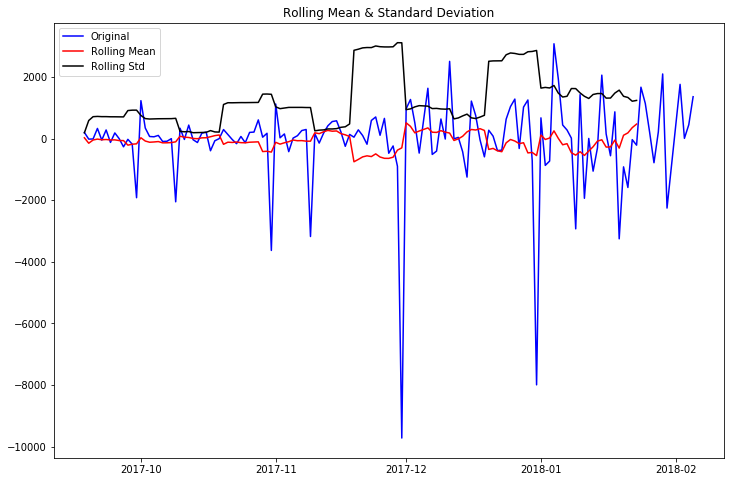

Results of Dickey-Fuller Test:
Test Statistic                -7.174553e+00
p-value                        2.748808e-10
#Lags Used                     4.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (5%)           -2.883528e+00
Critical Value (1%)           -3.480500e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


In [360]:
X_top1['first_difference_price'] = X_top1.Price_BTC - X_top1.Price_BTC.shift(1)  
test_stationarity(X_top1.first_difference_price.dropna(inplace=False))

## Differencing the data has the desired effect of increasing stationarity

In [73]:
X_price = X_top1[['Date', 'Price_BTC']]

In [74]:
X_price.set_index('Date',inplace = True)

In [70]:
X_delta = X_top1[['Date', 'Pecent_Delta_BTC']]
X_delta.set_index('Date',inplace = True)

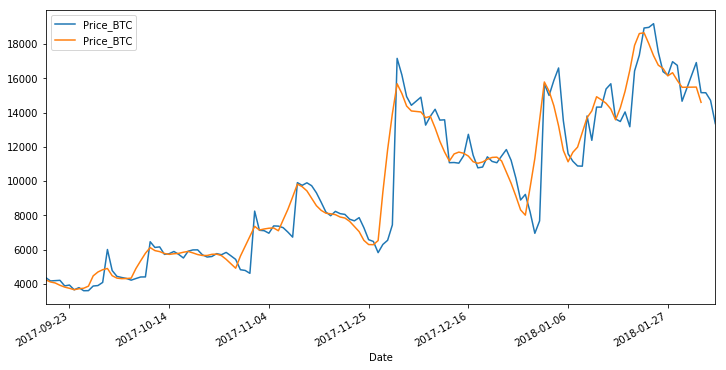

In [239]:
fig, ax = plt.subplots(figsize=(12,6))

X_price.rolling(window=1).mean().plot(ax=ax)
X_price.rolling(window=4).mean().plot(ax=ax, label='monthly')

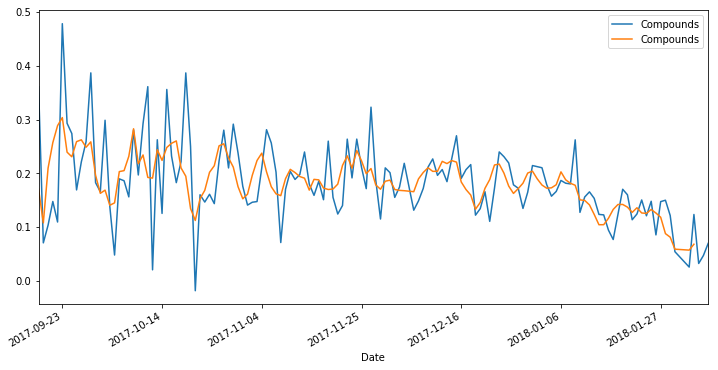

In [240]:
fig, ax = plt.subplots(figsize=(12,6))

X_comp.rolling(window=1).mean().plot(ax=ax)
X_comp.rolling(window=4).mean().plot(ax=ax, label='monthly')

In [241]:
print '1 Day Lag AutoCorr', X_price['Price_BTC'].autocorr(lag=1)
print '2 Day Lag AutoCorr', X_price['Price_BTC'].autocorr(lag=2)
print '1 Week Lag AutoCorr', X_price['Price_BTC'].autocorr(lag=7)

1 Day Lag AutoCorr 0.944681182243
2 Day Lag AutoCorr 0.894040823762
1 Week Lag AutoCorr 0.751843682534


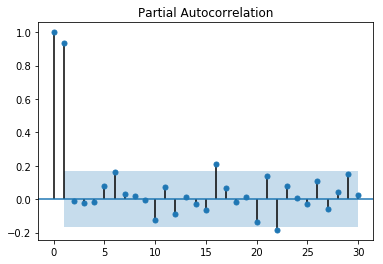

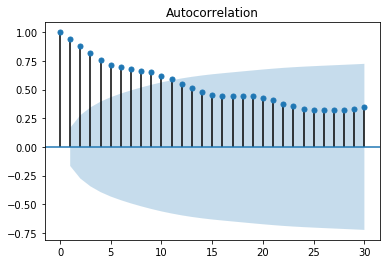

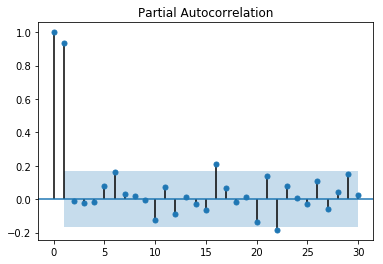

In [75]:
#Plotting the Autocorrelation and Partial Autocorrelation functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(X_price, lags = 30 )
plot_pacf(X_price, lags = 30)

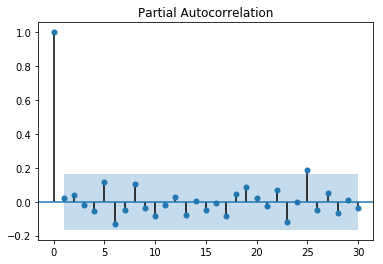

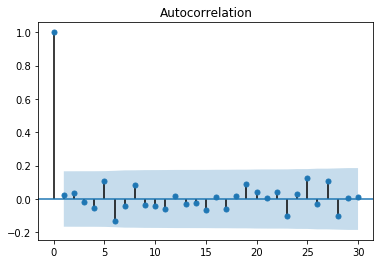

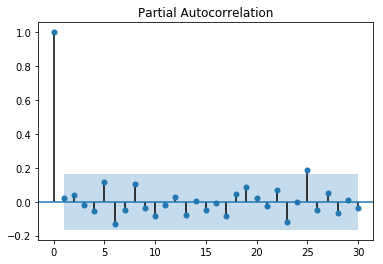

In [76]:
plot_acf(X_delta, lags = 30 )
plot_pacf(X_delta, lags = 30)

In [244]:
print '1 Day Lag AutoCorr', X_comp['Compounds'].autocorr(lag=1)
print '2 Day Lag AutoCorr', X_comp['Compounds'].autocorr(lag=2)
print '1 Week Lag AutoCorr', X_comp['Compounds'].autocorr(lag=7)

1 Day Lag AutoCorr 0.242369583029
2 Day Lag AutoCorr 0.125095193704
1 Week Lag AutoCorr 0.0994278977854


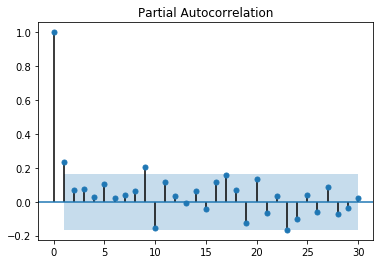

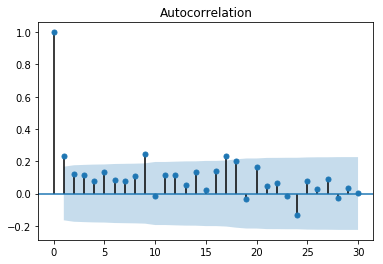

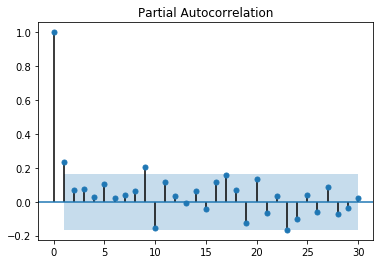

In [247]:
plot_acf(X_comp, lags = 30)
plot_pacf(X_comp, lags = 30)

In [526]:
X_top1.corr()

,Compounds,Neg,Neu,Pos,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC,first_difference,first_difference_price,Compound_shift,Neg_shift,Pos_shift,Neu_shift
Compounds,1.000000,-0.706443,0.135396,0.491171,-0.369674,-0.358188,-0.365288,-0.361622,-0.018941,0.621572,-0.077356,0.242370,-0.293515,-0.020922,0.225005
Neg,-0.706443,1.000000,-0.661009,-0.067683,0.375792,0.361489,0.370772,0.365751,0.016254,-0.392784,0.057114,-0.223071,0.414546,0.127432,-0.390654
Neu,0.135396,-0.661009,1.000000,-0.703474,-0.302732,-0.292117,-0.300305,-0.296009,-0.001969,0.003338,-0.018537,0.116916,-0.282647,-0.131893,0.302101
Pos,0.491171,-0.067683,-0.703474,1.000000,0.035289,0.035696,0.037162,0.035768,-0.016052,0.364521,-0.033400,0.057151,-0.017309,0.052204,-0.029008
Price_BTC,-0.369674,0.375792,-0.302732,0.035289,1.000000,0.985052,0.995317,0.993367,0.015000,-0.000343,0.173565,-0.368240,0.382026,0.051262,-0.317296
Open_BTC,-0.358188,0.361489,-0.292117,0.035696,0.985052,1.000000,0.993846,0.986272,-0.147573,0.001922,0.123305,-0.358384,0.371991,0.038134,-0.299901
High_BTC,-0.365288,0.370772,-0.300305,0.037162,0.995317,0.993846,1.000000,0.989296,-0.058421,-0.000483,0.147781,-0.363860,0.378979,0.049430,-0.313428
Low_BTC,-0.361622,0.365751,-0.296009,0.035768,0.993367,0.986272,0.989296,1.000000,-0.032845,0.000359,0.179726,-0.359984,0.374479,0.041215,-0.304584
Pecent_Delta_BTC,-0.018941,0.016254,-0.001969,-0.016052,0.015000,-0.147573,-0.058421,-0.032845,1.000000,0.010111,0.190860,-0.038959,0.015685,0.126570,-0.107887
first_difference,0.621572,-0.392784,0.003338,0.364521,-0.000343,0.001922,-0.000483,0.000359,0.010111,1.000000,-0.037140,-0.609350,0.323946,-0.417525,0.086190


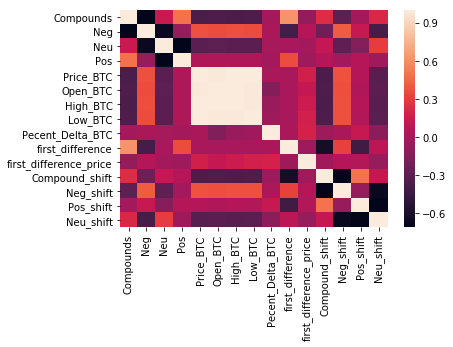

In [525]:
sns.heatmap(X_top1.corr())

## The lagged sentiment scores have similar correlations to the Bitcoin data as the unlagged scores

In [248]:
X_top1.shape

(139, 11)

In [55]:
X_sec1.shape

(139, 15)

In [472]:
X_top1.shape[0]*.80

111.2

In [56]:
X_sec1.shape[0]*.80

111.2

In [62]:
X_top_inv = X_top1.iloc[::-1]

In [57]:
X_sec_inv = X_sec1.iloc[::-1]

In [63]:
#Slicing the dataframes into training and testing dataframes
train = X_top_inv.head(110)

In [58]:
train_sec = X_sec_inv.head(110)

In [474]:
train

,Compounds,Neg,Neu,Pos,Date,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC,first_difference,first_difference_price,Compound_shift,Neg_shift,Pos_shift,Neu_shift
index,,,,,,,,,,,,,,,,
2017-09-18,0.360807,0.023786,0.866286,0.109929,2017-09-18,4367.0,4168.1,4393.4,4160.1,4.73,0.290138,197.1,0.070670,0.083435,0.078696,0.837870
2017-09-19,0.070670,0.083435,0.837870,0.078696,2017-09-19,4169.9,4190.0,4244.6,4024.7,-0.48,-0.032838,-20.1,0.103507,0.080286,0.093714,0.826071
2017-09-20,0.103507,0.080286,0.826071,0.093714,2017-09-20,4190.0,4207.5,4268.6,4125.0,-0.37,-0.044098,-15.4,0.147606,0.062333,0.083222,0.854444
2017-09-21,0.147606,0.062333,0.854444,0.083222,2017-09-21,4205.4,3881.6,4226.5,3878.1,8.41,0.038165,326.3,0.109441,0.072000,0.094955,0.832955
2017-09-22,0.109441,0.072000,0.832955,0.094955,2017-09-22,3879.1,3930.0,3983.0,3850.9,-1.30,-0.368772,-50.9,0.478212,0.020875,0.141250,0.838000
2017-09-23,0.478212,0.020875,0.838000,0.141250,2017-09-23,3930.0,3654.7,3977.0,3654.7,7.59,0.185163,277.2,0.293050,0.051600,0.122600,0.825900
2017-09-24,0.293050,0.051600,0.825900,0.122600,2017-09-24,3652.8,3779.6,3781.3,3620.0,-3.35,0.019105,-126.8,0.273945,0.041900,0.095150,0.862900
2017-09-25,0.273945,0.041900,0.862900,0.095150,2017-09-25,3779.6,3598.7,3808.0,3559.1,5.03,0.104816,181.1,0.169129,0.065000,0.194857,0.740286
2017-09-26,0.169129,0.065000,0.740286,0.194857,2017-09-26,3598.5,3597.3,3743.6,3493.5,-0.14,-0.051995,-4.9,0.221123,0.053615,0.121462,0.824923


In [64]:
test = X_top_inv.dropna(inplace=False).tail(28)

In [59]:
test_sec = X_sec_inv.dropna(inplace=False).tail(28)

In [478]:
test

,Compounds,Neg,Neu,Pos,Date,Price_BTC,Open_BTC,High_BTC,Low_BTC,Pecent_Delta_BTC,first_difference,first_difference_price,Compound_shift,Neg_shift,Pos_shift,Neu_shift
index,,,,,,,,,,,,,,,,
2018-01-07,0.181572,0.047499,0.835182,0.117305,2018-01-07,11157.0,10880.0,11842.0,10299.0,2.54,0.001304,276.0,0.180268,0.047936,0.109736,0.842330
2018-01-08,0.180268,0.047936,0.842330,0.109736,2018-01-08,10881.0,10852.0,11187.0,10627.0,0.11,-0.081944,12.0,0.262212,0.045938,0.122119,0.831933
2018-01-09,0.262212,0.045938,0.831933,0.122119,2018-01-09,10869.0,9907.0,10949.0,9370.1,9.71,0.134842,-2931.0,0.127370,0.065613,0.109373,0.823312
2018-01-10,0.127370,0.065613,0.823312,0.109373,2018-01-10,13800.0,12385.0,14140.0,12183.9,11.50,-0.028604,1423.0,0.155974,0.057474,0.110220,0.831030
2018-01-11,0.155974,0.057474,0.831030,0.110220,2018-01-11,12377.0,14308.0,14403.0,11690.0,-13.55,-0.009524,-1940.0,0.165497,0.056771,0.107730,0.834732
2018-01-12,0.165497,0.056771,0.834732,0.107730,2018-01-12,14317.0,14323.0,15105.0,13847.0,0.01,0.012070,2.0,0.153427,0.056720,0.100983,0.841402
2018-01-13,0.153427,0.056720,0.841402,0.100983,2018-01-13,14315.0,15374.0,15467.0,13232.0,-6.89,0.029857,-1059.0,0.123570,0.068132,0.100278,0.831576
2018-01-14,0.123570,0.068132,0.831576,0.100278,2018-01-14,15374.0,15680.0,16494.0,14463.0,-1.95,0.000873,-305.0,0.122698,0.064358,0.102805,0.832085
2018-01-15,0.122698,0.064358,0.832085,0.102805,2018-01-15,15679.0,13627.0,16048.0,13550.0,15.09,0.028360,2056.0,0.094338,0.084306,0.113029,0.802672


In [479]:
test.shape

(28, 16)

In [480]:
train.shape

(110, 16)

In [323]:
train.index

DatetimeIndex(['2017-09-18', '2017-09-19', '2017-09-20', '2017-09-21',
               '2017-09-22', '2017-09-23', '2017-09-24', '2017-09-25',
               '2017-09-26', '2017-09-27',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name=u'index', length=104, freq=None)

In [481]:
# arima1 = sm.tsa.ARIMA(train.Price_BTC, order=(2,1,0), exog=train[['Compound_shift', 'Neg_shift', 'Pos_shift', 'Neu_shift']], dates=train.index)
# model = arima1.fit()
# print model.summary()

                             ARIMA Model Results                              
Dep. Variable:            D.Price_BTC   No. Observations:                  109
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -949.023
Method:                       css-mle   S.D. of innovations           1462.085
Date:                Mon, 12 Feb 2018   AIC                           1914.045
Time:                        15:32:25   BIC                           1935.576
Sample:                    09-19-2017   HQIC                          1922.777
                         - 01-06-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.026e+05        nan        nan        nan         nan         nan
Compound_shift     1278.1224   3127.948      0.409      0.684   -4852.543    7408.788
Neg_shift         -1.047

In [65]:
arima_sec = sm.tsa.ARIMA(train_sec.Price_BTC, order=(2,1,0), exog=train_sec[['Compound_shift', 'Neg_shift', 'Pos_shift', 'Neu_shift']], dates=train.index)
model_sec = arima_sec.fit()
print model_sec.summary()

                             ARIMA Model Results                              
Dep. Variable:            D.Price_BTC   No. Observations:                  109
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -869.813
Method:                       css-mle   S.D. of innovations            706.939
Date:                Fri, 16 Feb 2018   AIC                           1755.626
Time:                        01:15:51   BIC                           1777.157
Sample:                    09-19-2017   HQIC                          1764.357
                         - 01-06-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -5.05e+04   5.79e+04     -0.872      0.385   -1.64e+05     6.3e+04
Compound_shift      446.1118   1499.281      0.298      0.767   -2492.425    3384.649
Neg_shift           4.77

In [488]:
# start = 109
# end = 136
# ar1_preds = model.predict(start=start, end=end, exog=test[['Compound_shift', 'Neg_shift', 'Pos_shift', 'Neu_shift']], dynamic=True, typ='levels')

In [66]:
start = 109
end = 136
arsec_preds = model_sec.predict(start=start, end=end, exog=test[['Compound_shift', 'Neg_shift', 'Pos_shift', 'Neu_shift']], dynamic=True, typ='levels')

In [78]:
arima2 = sm.tsa.ARIMA(train.Pecent_Delta_BTC, order=(1,1,0), exog=train[['Compound_shift', 'Neg_shift', 'Pos_shift', 'Neu_shift']], dates=train.index)
model2 = arima2.fit()
print model2.summary()

                             ARIMA Model Results                              
Dep. Variable:     D.Pecent_Delta_BTC   No. Observations:                  109
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -366.385
Method:                       css-mle   S.D. of innovations              6.967
Date:                Fri, 16 Feb 2018   AIC                            746.770
Time:                        02:03:25   BIC                            765.609
Sample:                    09-19-2017   HQIC                           754.410
                         - 01-06-2018                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1210.7240        nan        nan        nan         nan         nan
Compound_shift             -15.7343     13.051     -1.206      0.231     -41.314       9.

/Users/elaiken3/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/elaiken3/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/elaiken3/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/elaiken3/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Used an ARIMA model with (p,d,q) = (2,1,0). The AIC score was better when I used the percent change in the price of Bitcoin as the target instead of the actual price of Bitcoin. This would indicate that the former is a better model overall.

In [79]:
start = 109
end = 136
ar1_preds2 = model2.predict(start=start, end=end, exog=test[['Compound_shift', 'Neg_shift', 'Pos_shift', 'Neu_shift']], dynamic=True,)

In [80]:
#Finding the mean error between the predicted values and the actual values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['Pecent_Delta_BTC'], ar1_preds2)

5.9881354478001088

In [491]:
# test.Price_BTC.values 

array([ 11157. ,  10881. ,  10869. ,  13800. ,  12377. ,  14317. ,
        14315. ,  15374. ,  15679. ,  13623. ,  13476. ,  14035. ,
        13170. ,  16425. ,  17345. ,  18934. ,  18971. ,  19187. ,
        17522. ,  16383. ,  16181. ,  16967. ,  16754. ,  14660. ,
        16917. ,  15160. ,  15155. ,  14709.8])

In [492]:
# ar1_preds.values

array([ 13510.46027858,  13805.42835709,  13896.08184595,  13960.01667464,
        14058.05278401,  14127.40342683,  14214.12041308,  14147.52205775,
        14156.37699608,  13970.9456671 ,  13907.64121242,  13776.70293999,
        13793.1328005 ,  13776.80201031,  13675.13858745,  13703.83500409,
        13802.7688795 ,  14117.43540422,  14406.25099721,  14392.67314422,
        14403.40902696,  14388.70045538,  14354.66740336,  14116.68408683,
        13875.17956354,  13753.88314396,  13506.393933  ,  13285.01956348])

In [517]:
ar1_preds2.values

array([-2.74706268,  4.93630383, -1.37905905,  1.11511856,  1.87738288,
        0.32977931,  0.57771658, -0.27519577,  0.45514623, -0.26324626,
        0.26727679,  0.04630078, -0.09445729,  0.54757435, -0.01875186,
        0.44740561,  0.91919613,  2.90189881,  2.18478184,  0.8163329 ,
        0.30133979, -0.27460443, -0.56667715, -0.52151162, -1.01611328,
        0.04806365, -0.43574694, -0.16842597])

In [518]:
test['preds2'] = ar1_preds2.values

In [82]:
test['resids2'] = test.Pecent_Delta_BTC.values - ar1_preds2.values

In [495]:
# test['Price_BTC']

In [83]:
test['resids2'].mean()

0.2545677837925151

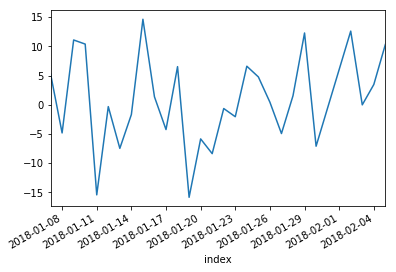

In [521]:
test['resids2'].plot()

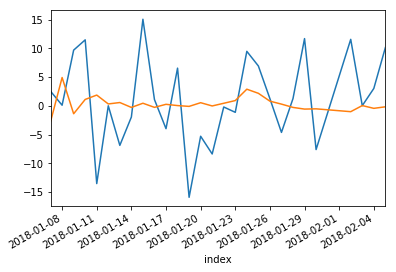

In [524]:
#Blue line = Actual Values
#Orange line = Predicted Value
test['Pecent_Delta_BTC'].plot()
test['preds2'].plot()

## Based on the plot of the predicted vs. the actual values, the model did not do a good job of predicting what the actual change in the price of Bitcoin would be from day to day based on the sentiment scores. It was able in some cases to capture the directionality of the percent change in the price of bitcoin. This is represented by a small peak in the predicted values graph when there was a much larger peak in the graph of the actual values. 

## Overall the model did not perform well given the data.